In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

In [11]:
def generate_heatmap(df: pd.DataFrame, filename: str):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    epsilon_values = [0.5, 1, 2, 4, 8, 16]

    for i, epsilon in enumerate(epsilon_values):
        subset = df.loc[(epsilon, slice(None))]
        sns.heatmap(subset, annot=True, fmt=".2f", ax=axes[i//3, i%3], cmap="coolwarm")
        axes[i//3, i%3].set_title(f"Epsilon = {epsilon}")

    # Adjust layout
    plt.tight_layout()
    plt.show()

    fig.savefig(filename)

In [25]:
def generate_heatmap2(df: pd.DataFrame, colors: list, filename: str):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    epsilon_values = [0.5, 1, 2, 4, 8, 16]

    n_bins = 100  # Discretizes the interpolation into bins
    cmap_name = 'my_custom_blue_red'
    cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

    # Determine the common vmin and vmax for all subplots
    vmin = df.min().min()
    vmax = df.max().max()

    for i, epsilon in enumerate(epsilon_values):
        subset = df.loc[(epsilon, slice(None))]
        sns.heatmap(subset, annot=True, fmt=".2f", ax=axes[i//3, i%3], cmap=cmap, center=0, vmin=vmin, vmax=vmax)
        axes[i//3, i%3].set_title(f"Epsilon = {epsilon}")

    # Adjust layout
    plt.tight_layout()
    plt.show()

    fig.savefig(filename)

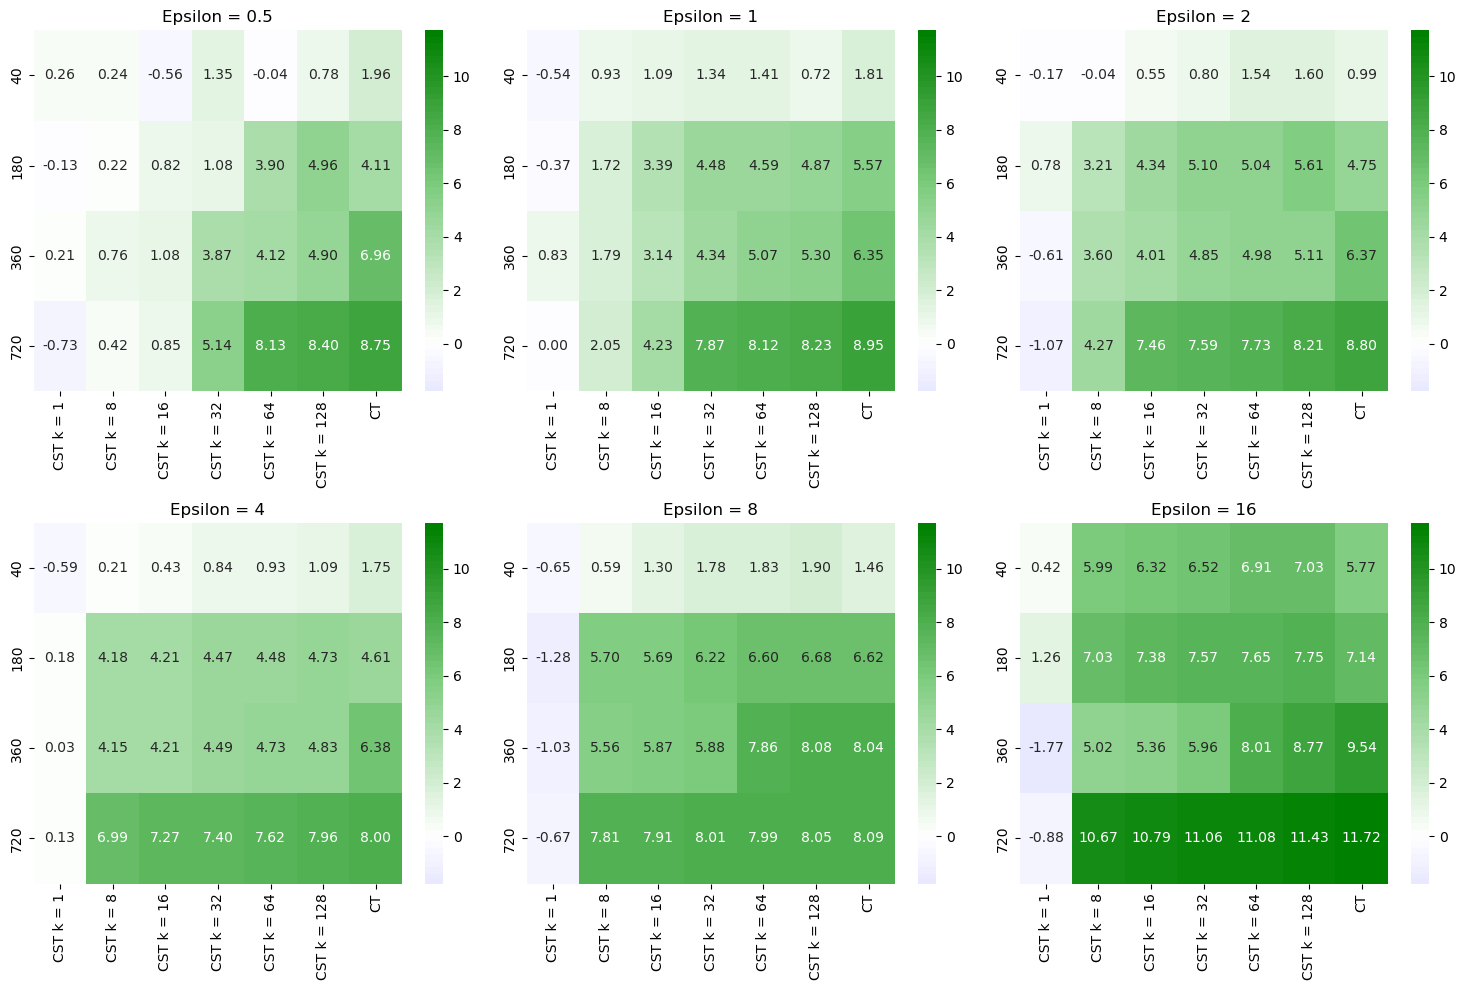

In [39]:
semsim = {
    (0.5, 40): [0.26, 0.24, -0.56, 1.35, -0.04, 0.78, 1.96],
    (0.5, 180): [-0.13, 0.22, 0.82, 1.08, 3.90, 4.96, 4.11],
    (0.5, 360): [0.21, 0.76, 1.08, 3.87, 4.12, 4.90, 6.96],
    (0.5, 720): [-0.73, 0.42, 0.85, 5.14, 8.13, 8.40, 8.75],
    (1, 40): [-0.54, 0.93, 1.09, 1.34, 1.41, 0.72, 1.81],
    (1, 180): [-0.37, 1.72, 3.39, 4.48, 4.59, 4.87, 5.57],
    (1, 360): [0.83, 1.79, 3.14, 4.34, 5.07, 5.30, 6.35],
    (1, 720): [0.00, 2.05, 4.23, 7.87, 8.12, 8.23, 8.95],
    (2, 40): [-0.17, -0.04, 0.55, 0.80, 1.54, 1.60, 0.99],
    (2, 180): [0.78, 3.21, 4.34, 5.10, 5.04, 5.61, 4.75],
    (2, 360): [-0.61, 3.60, 4.01, 4.85, 4.98, 5.11, 6.37],
    (2, 720): [-1.07, 4.27, 7.46, 7.59, 7.73, 8.21, 8.80],
    (4, 40): [-0.59, 0.21, 0.43, 0.84, 0.93, 1.09, 1.75],
    (4, 180): [0.18, 4.18, 4.21, 4.47, 4.48, 4.73, 4.61],
    (4, 360): [0.03, 4.15, 4.21, 4.49, 4.73, 4.83, 6.38],
    (4, 720): [0.13, 6.99, 7.27, 7.40, 7.62, 7.96, 8.00],
    (8, 40): [-0.65, 0.59, 1.30, 1.78, 1.83, 1.90, 1.46],
    (8, 180): [-1.28, 5.70, 5.69, 6.22, 6.60, 6.68, 6.62],
    (8, 360): [-1.03, 5.56, 5.87, 5.88, 7.86, 8.08, 8.04],
    (8, 720): [-0.67, 7.81, 7.91, 8.01, 7.99, 8.05, 8.09],
    (16, 40): [0.42, 5.99, 6.32, 6.52, 6.91, 7.03, 5.77],
    (16, 180): [1.26, 7.03, 7.38, 7.57, 7.65, 7.75, 7.14],
    (16, 360): [-1.77, 5.02, 5.36, 5.96, 8.01, 8.77, 9.54],
    (16, 720): [-0.88, 10.67, 10.79, 11.06, 11.08, 11.43, 11.72],
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(semsim).T
df.columns = ["CST k = 1", "CST k = 8", "CST k = 16", "CST k = 32", "CST k = 64", "CST k = 128", "CT"]

# red
# colors = [(0, 0.5, 1), (0.7, 0.7, 1), (1, 1, 1), (1, 0.6, 0.4), (0.9, 0.2, 0)]
colors = [(0, 0.5, 1), (0.7, 0.7, 1), (1, 1, 1), (0.5, 0.8, 0.5), (0, 0.5, 0)]

generate_heatmap2(df, colors, "heatmap_semantic_sim.pdf")

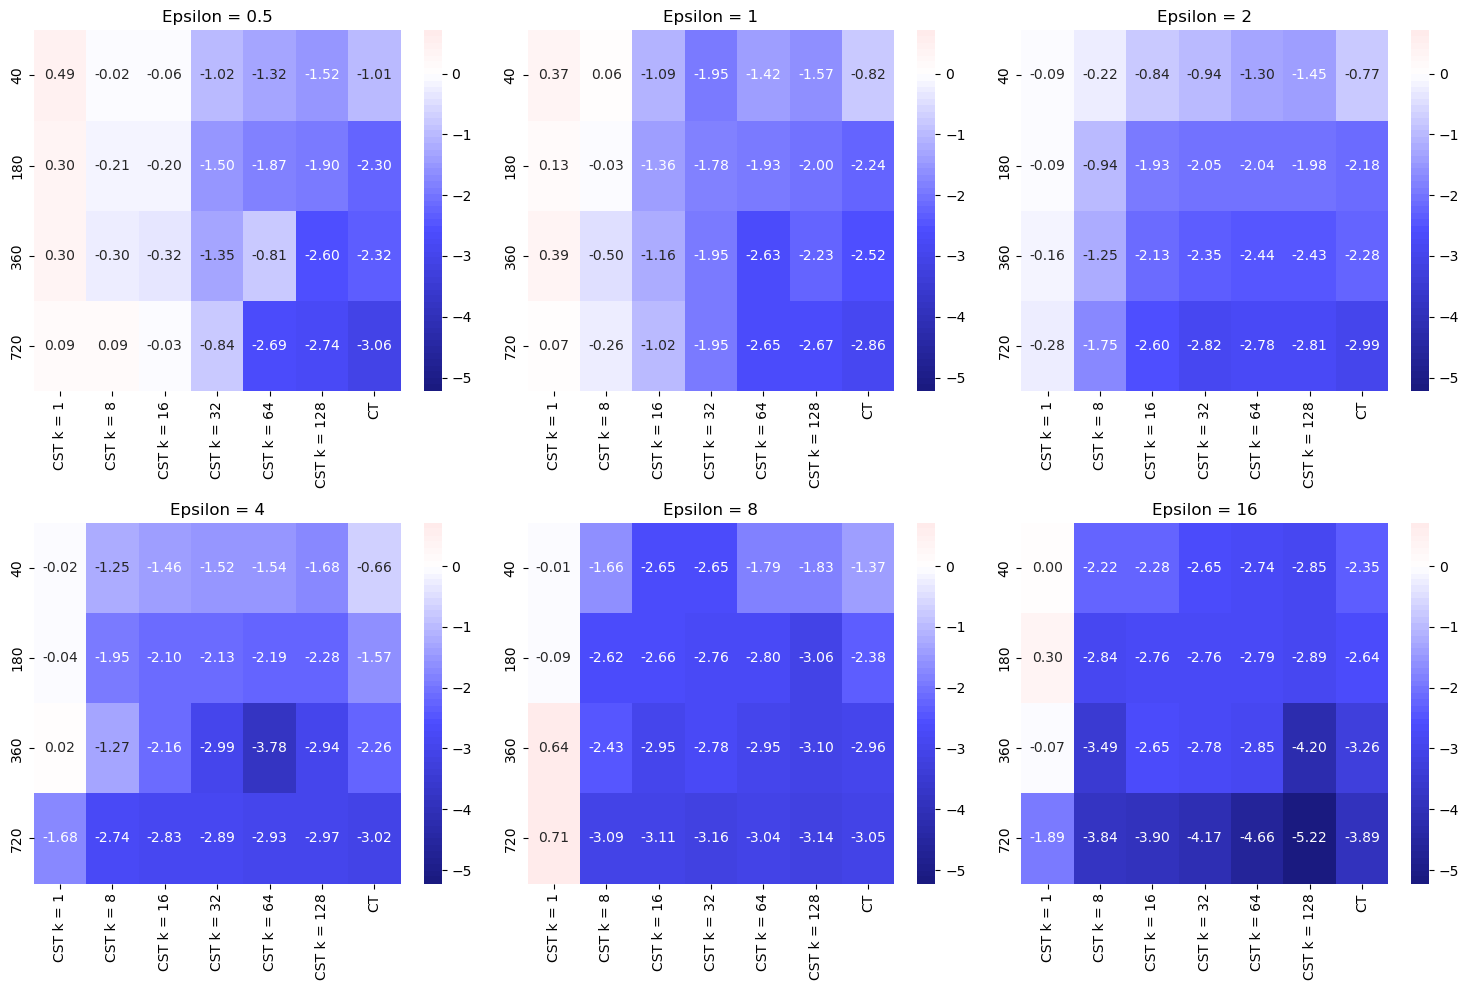

In [40]:
import pandas as pd

# Data transcription
perplexity = {
    (0.5, 40): [0.49, -0.02, -0.06, -1.02, -1.32, -1.52, -1.01],
    (0.5, 180): [0.30, -0.21, -0.20, -1.50, -1.87, -1.90, -2.30],
    (0.5, 360): [0.30, -0.30, -0.32, -1.35, -0.81, -2.60, -2.32],
    (0.5, 720): [0.09, 0.09, -0.03, -0.84, -2.69, -2.74, -3.06],
    (1, 40): [0.37, 0.06, -1.09, -1.95, -1.42, -1.57, -0.82],
    (1, 180): [0.13, -0.03, -1.36, -1.78, -1.93, -2.00, -2.24],
    (1, 360): [0.39, -0.50, -1.16, -1.95, -2.63, -2.23, -2.52],
    (1, 720): [0.07, -0.26, -1.02, -1.95, -2.65, -2.67, -2.86],
    (2, 40): [-0.09, -0.22, -0.84, -0.94, -1.30, -1.45, -0.77],
    (2, 180): [-0.09, -0.94, -1.93, -2.05, -2.04, -1.98, -2.18],
    (2, 360): [-0.16, -1.25, -2.13, -2.35, -2.44, -2.43, -2.28],
    (2, 720): [-0.28, -1.75, -2.60, -2.82, -2.78, -2.81, -2.99],
    (4, 40): [-0.02, -1.25, -1.46, -1.52, -1.54, -1.68, -0.66],
    (4, 180): [-0.04, -1.95, -2.10, -2.13, -2.19, -2.28, -1.57],
    (4, 360): [0.02, -1.27, -2.16, -2.99, -3.78, -2.94, -2.26],
    (4, 720): [-1.68, -2.74, -2.83, -2.89, -2.93, -2.97, -3.02],
    (8, 40): [-0.01, -1.66, -2.65, -2.65, -1.79, -1.83, -1.37],
    (8, 180): [-0.09, -2.62, -2.66, -2.76, -2.80, -3.06, -2.38],
    (8, 360): [0.64, -2.43, -2.95, -2.78, -2.95, -3.10, -2.96],
    (8, 720): [0.71, -3.09, -3.11, -3.16, -3.04, -3.14, -3.05],
    (16, 40): [0.00, -2.22, -2.28, -2.65, -2.74, -2.85, -2.35],
    (16, 180): [0.30, -2.84, -2.76, -2.76, -2.79, -2.89, -2.64],
    (16, 360): [-0.07, -3.49, -2.65, -2.78, -2.85, -4.20, -3.26],
    (16, 720): [-1.89, -3.84, -3.90, -4.17, -4.66, -5.22, -3.89],
}

# Convert the dictionary to a DataFrame
df_new = pd.DataFrame(perplexity).T
df_new.columns = ["CST k = 1", "CST k = 8", "CST k = 16", "CST k = 32", "CST k = 64", "CST k = 128", "CT"]

# blue
colors = [(0.1, 0.1, 0.5), (0.3, 0.3, 1), (1, 1, 1), (1, 0.7, 0.7), (0.8, 0, 0)]
generate_heatmap2(df_new, colors, "perplexity_heatmap.pdf")